In [1]:
#import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
#load the dataset into pandas dataframe
customer_data=pd.read_csv("sankari_107_ml_project_3_kmean_clustering.csv")
customer_data

,Date,Time,CustomerType,ProductCategory,UnitPrice,Quantity,Total,FullName
0,31-12-2023 15.41,6.04.28,Member,Grocery,10.69,4,42.76,Jai Bhatia
1,07-01-2024 22.19,1.05.18,Premium,Home & Kitchen,381.03,3,1143.09,Ishaan Patel
2,10-01-2024 2.09,17.31.43,Regular,Grocery,153.84,5,769.20,Tanvi Iyer
3,01-06-2023 10.46,1.50.16,Regular,Electronics,341.41,4,1365.64,Zara Xavier
4,23-05-2024 22.07,10.37.06,Regular,Home & Kitchen,390.16,5,1950.80,Krishna Zutshi
...,...,...,...,...,...,...,...,...
999995,16-08-2023 21.13,15.37.01,Premium,Electronics,256.80,1,256.80,Priya Wadhwa
999996,18-01-2024 13.01,15.05.47,Regular,Electronics,191.20,3,573.60,Nandini Iyer
999997,05-10-2023 19.16,5.38.49,Premium,Home & Kitchen,324.33,5,1621.65,Zara Jain
999998,03-04-2024 14.55,10.14.32,Regular,Home & Kitchen,39.27,3,117.81,Nandini Wadhwa


In [3]:
#print first 10 rows
customer_data.head(10)

,Date,Time,CustomerType,ProductCategory,UnitPrice,Quantity,Total,FullName
0,31-12-2023 15.41,6.04.28,Member,Grocery,10.69,4,42.76,Jai Bhatia
1,07-01-2024 22.19,1.05.18,Premium,Home & Kitchen,381.03,3,1143.09,Ishaan Patel
2,10-01-2024 2.09,17.31.43,Regular,Grocery,153.84,5,769.20,Tanvi Iyer
3,01-06-2023 10.46,1.50.16,Regular,Electronics,341.41,4,1365.64,Zara Xavier
4,23-05-2024 22.07,10.37.06,Regular,Home & Kitchen,390.16,5,1950.80,Krishna Zutshi
5,16-02-2024 19.41,22.41.47,Member,Grocery,170.21,4,680.84,Zara Singh
6,30-11-2023 3.36,9.36.45,Member,Clothing,81.74,2,163.48,Eeshaan Xavier
7,05-06-2024 5.21,20.02.39,Premium,Clothing,181.26,3,543.78,Eeshaan Kumar
8,07-06-2024 21.40,21.07.44,Premium,Electronics,471.89,2,943.78,Mahesh Mehta
9,29-12-2023 4.35,17.53.54,Member,Grocery,59.70,2,119.40,Ishaan Verma


In [4]:
#getting some basic information about the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Date             1000000 non-null  object 
 1   Time             1000000 non-null  object 
 2   CustomerType     1000000 non-null  object 
 3   ProductCategory  1000000 non-null  object 
 4   UnitPrice        1000000 non-null  float64
 5   Quantity         1000000 non-null  int64  
 6   Total            1000000 non-null  float64
 7   FullName         1000000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 61.0+ MB


In [5]:
#find the number of rows and columns
customer_data.shape

(1000000, 8)

In [6]:
#finding the missing values
customer_data.isna().sum()

Date               0
Time               0
CustomerType       0
ProductCategory    0
UnitPrice          0
Quantity           0
Total              0
FullName           0
dtype: int64

In [7]:
#Category listing in the product category
customer_data['ProductCategory'].unique()

array(['Grocery', 'Home & Kitchen', 'Electronics', 'Clothing',
       'Beauty & Personal Care'], dtype=object)

In [8]:
#Categorical mapping for the product category by label encoder
label_encoding=LabelEncoder()
customer_data['ProductCategory']=label_encoding.fit_transform(customer_data['ProductCategory'])
print(customer_data.head())

print(label_encoding.classes_)


               Date      Time CustomerType  ProductCategory  UnitPrice  \
0  31-12-2023 15.41   6.04.28       Member                3      10.69   
1  07-01-2024 22.19   1.05.18      Premium                4     381.03   
2   10-01-2024 2.09  17.31.43      Regular                3     153.84   
3  01-06-2023 10.46   1.50.16      Regular                2     341.41   
4  23-05-2024 22.07  10.37.06      Regular                4     390.16   

   Quantity    Total        FullName  
0         4    42.76      Jai Bhatia  
1         3  1143.09    Ishaan Patel  
2         5   769.20      Tanvi Iyer  
3         4  1365.64     Zara Xavier  
4         5  1950.80  Krishna Zutshi  
['Beauty & Personal Care' 'Clothing' 'Electronics' 'Grocery'
 'Home & Kitchen']


In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Date             1000000 non-null  object 
 1   Time             1000000 non-null  object 
 2   CustomerType     1000000 non-null  object 
 3   ProductCategory  1000000 non-null  int32  
 4   UnitPrice        1000000 non-null  float64
 5   Quantity         1000000 non-null  int64  
 6   Total            1000000 non-null  float64
 7   FullName         1000000 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 57.2+ MB


In [10]:
# Choose the unit price, quantity, and total column. I have sliced the 3 columns from the given dataset for cluster the data
x=customer_data.iloc[:,[3,4,5,6]].values

In [11]:
print(x)

[[   3.     10.69    4.     42.76]
 [   4.    381.03    3.   1143.09]
 [   3.    153.84    5.    769.2 ]
 ...
 [   4.    324.33    5.   1621.65]
 [   4.     39.27    3.    117.81]
 [   4.    347.68    4.   1390.72]]


In [12]:
# Standarize the x-data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
#Now choose the correct number of clusters. So, I use the wcss method(within cluster sum of squares)

#find WCSS
wcss = [] 

print("Calculating WCSS...")

for i in range(1, 11):
    print("Running KMeans for {i} clusters...") 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x_scaled)

    #storing for wcss
    wcss.append(kmeans.inertia_) 

# Check length of WCSS
print("Final Length of WCSS:", len(wcss))  # we need to get the output 10
print("WCSS Values:", wcss)  # Print WCSS values for debugging


Calculating WCSS...
Running KMeans for {i} clusters...
Running KMeans for {i} clusters...
Running KMeans for {i} clusters...
Running KMeans for {i} clusters...
Running KMeans for {i} clusters...
Running KMeans for {i} clusters...
Running KMeans for {i} clusters...
Running KMeans for {i} clusters...
Running KMeans for {i} clusters...
Running KMeans for {i} clusters...
Final Length of WCSS: 10
WCSS Values: [3999999.99999994, 2650936.3773395023, 2067237.9347931228, 1715073.399978355, 1471949.1162237776, 1265195.128615906, 1101107.259737358, 978911.5557906211, 887330.8300024671, 818464.9535374145]


In [14]:
# Check the length of wcss to debug
print("Length of WCSS:", len(wcss))

Length of WCSS: 10


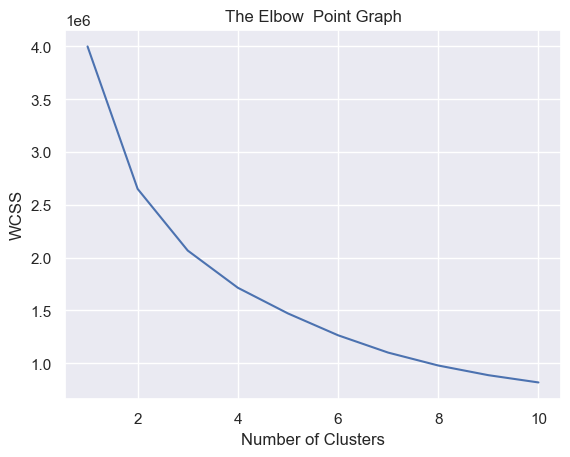

In [15]:
#we create the elbow graph to visualize the clustering value
#set the sns style
sns.set()
#create the elbow graph
plt.plot(range(1,11), wcss, linestyle='-')
plt.title("The Elbow  Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
 #trained KMeans with size k=3  and 
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
y = kmeans.fit_predict(x_scaled)  # Assign cluster labels to each data point

# Print assigned labels
print("Cluster Labels for each data point: from 0 to 2")
print(y)

Cluster Labels for each data point: from 0 to 2
[1 2 1 ... 2 1 2]


C:\Users\sanka\Desktop\Python\Datascience and ML\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


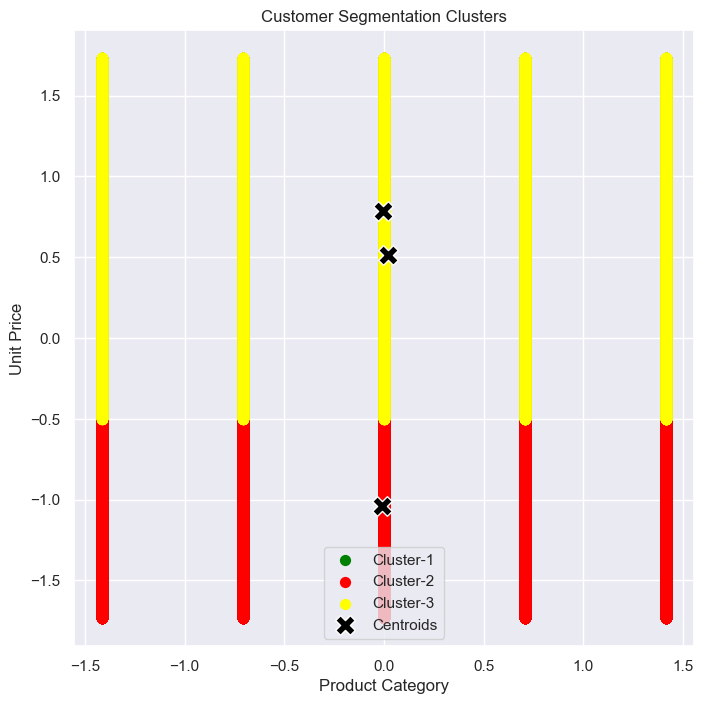

In [17]:
# After analyzing the graph, we decided cluster value k=5
#now visualizing all the clusters
#plotting all the clusters with the  centroid


plt.figure(figsize=(8, 8))

# Scatter plot for first two features
plt.scatter(x_scaled[y == 0, 0], x_scaled[y == 0, 1], s=50, c='green', label='Cluster-1')
plt.scatter(x_scaled[y == 1, 0], x_scaled[y == 1, 1], s=50, c='red', label='Cluster-2')
plt.scatter(x_scaled[y == 2, 0], x_scaled[y == 2, 1], s=50, c='yellow', label='Cluster-3')


# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', edgecolors='white', label='Centroids')

plt.title("Customer Segmentation Clusters")
plt.xlabel("Product Category")
plt.ylabel("Unit Price")
plt.legend()
plt.show()

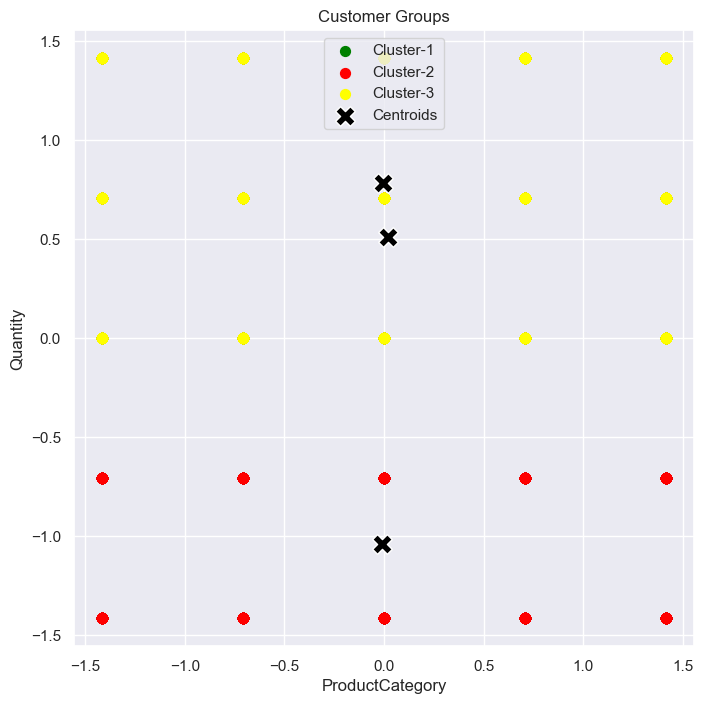

In [18]:
#This plots relationship between the productcategory and their quantity
plt.figure(figsize=(8, 8))

# Plot the clusters
plt.scatter(x_scaled[y == 0, 0], x_scaled[y == 0, 2], s=50, c='green', label='Cluster-1')
plt.scatter(x_scaled[y == 1, 0], x_scaled[y == 1, 2], s=50, c='red', label='Cluster-2')
plt.scatter(x_scaled[y == 2, 0], x_scaled[y == 2, 2], s=50, c='yellow', label='Cluster-3')



# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', edgecolors='white', label='Centroids')
plt.title("Customer Groups")
plt.xlabel("ProductCategory")
plt.ylabel("Quantity")
plt.legend()
plt.show()

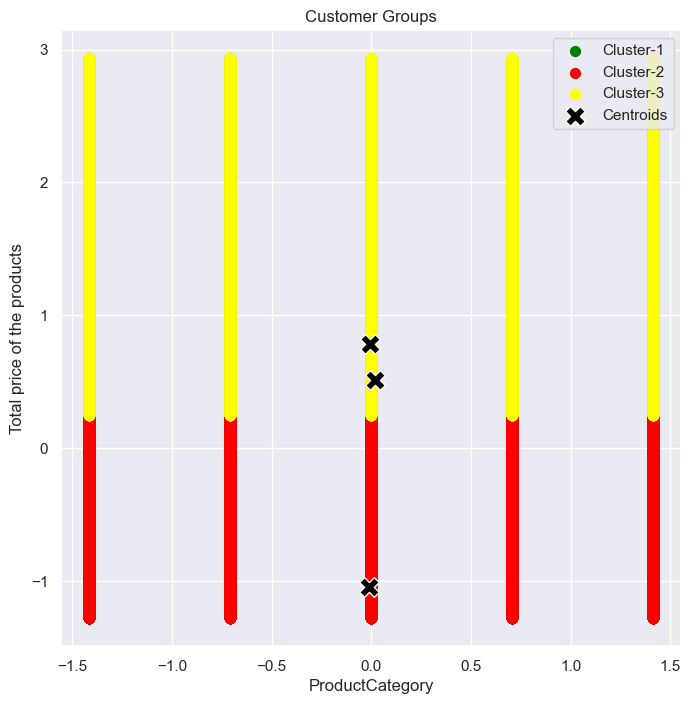

In [19]:
#This plots the category of the products and its total price
plt.figure(figsize=(8, 8))

# Plot the clusters
plt.scatter(x_scaled[y == 0, 0], x_scaled[y == 0, 3], s=50, c='green', label='Cluster-1')
plt.scatter(x_scaled[y == 1, 0], x_scaled[y == 1, 3], s=50, c='red', label='Cluster-2')
plt.scatter(x_scaled[y == 2, 0], x_scaled[y == 2, 3], s=50, c='yellow', label='Cluster-3')


# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', edgecolors='white', label='Centroids')
plt.title("Customer Groups")
plt.xlabel("ProductCategory")
plt.ylabel("Total price of the products")
plt.legend()
plt.show()

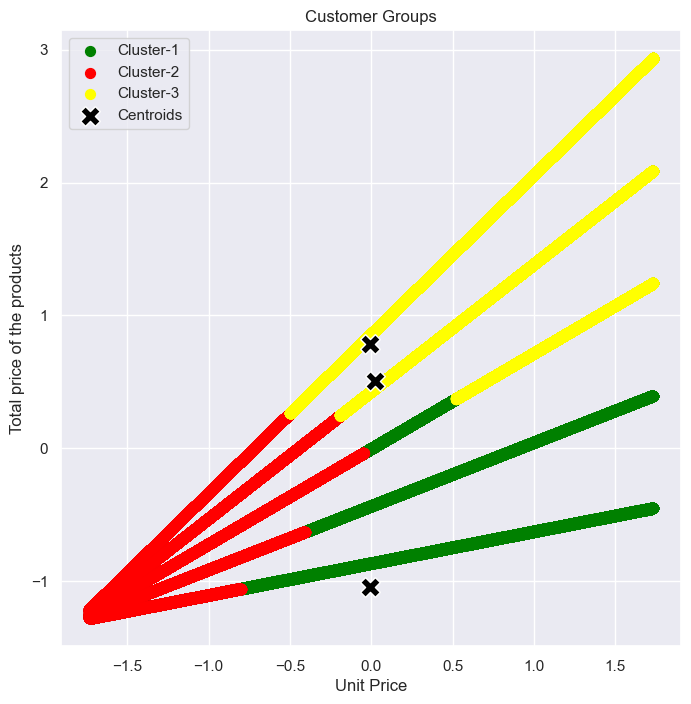

In [20]:
#This plots between Unit Price and its total price
plt.figure(figsize=(8, 8))

# Plot the clusters
plt.scatter(x_scaled[y == 0, 1], x_scaled[y == 0, 3], s=50, c='green', label='Cluster-1')
plt.scatter(x_scaled[y == 1, 1], x_scaled[y == 1, 3], s=50, c='red', label='Cluster-2')
plt.scatter(x_scaled[y == 2, 1], x_scaled[y == 2, 3], s=50, c='yellow', label='Cluster-3')


# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', edgecolors='white', label='Centroids')
plt.title("Customer Groups")
plt.xlabel("Unit Price")
plt.ylabel("Total price of the products")
plt.legend()
plt.show()